David Felipe Mora - Ciencias de la computación

# Tarea 4 - Notebook 1

# Prerrequisitos y datos

In [17]:
import numpy as np 
import scipy.optimize as op
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint

In [18]:
Datos = np.array([[3.46,0.0158],[4.58,0.0264],[5.67,0.0326],[6.64,0.0445], [7.63,	0.0646],\
[8.41,	0.0933],[9.32,	0.1454],[10.27,	0.2183],[11.19,	0.2842],[12.39,	0.4977],[13.42,	0.6033],\
[15.19,	0.8441],[16.24	,1.2163],[17.23,	1.447],[18.18,	2.3298],[19.29,	2.5342],[21.23	,3.0064],\
[21.99	,3.4044],[24.33,	3.2046],[25.58,	4.5241],[26.43,	4.3459],[27.44,	5.1374],[28.43	,5.5376],\
[30.49	,4.8946],[31.34,	5.066],[32.34	,6.1494],[33.00	,6.8548],[35.20,	5.9668],[36.34	,6.6945],\
[37.29	,6.6395],[38.50	,6.8971],[39.67	,7.2966],[41.37	,7.2268],[42.58,	6.8815],[45.39,	8.0993],\
[46.38	,7.2112],[48.29,	7.0694],[49.24	,7.4971],[50.19,	6.9974],[51.14,	6.7219],[52.10,	7.0523],\
[54.00,	7.1095],[56.33	,7.0694],[57.33,	8.0562],[59.38 ,	7.2268]])

tiempo = Datos[:,0]
Volumen = Datos[:,1]

# Problemas

# Problema 1

Considere el modelo polinomial de grado 1 y 3. Proponga un modelo polinomial de grado 4. Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo de grado 4. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 

-----

Funciones para calcular el residuo y optimizar los parametros:

In [35]:
def residuo_pol_4(params,V,tiempo):
    a, b, c, d, e = params
    Vmodelo = a + b*tiempo + c*np.power(tiempo,2) + d*np.power(tiempo,3) + e*np.power(tiempo,4)
    return np.linalg.norm(V - Vmodelo)


def optimize_pol_4(x0):
    optimo_pol_4 = op.minimize(residuo_pol_4,
                            x0,
                            args=(Volumen, tiempo),
                            method='Powell')

    parametros_optimo_pol_4 = optimo_pol_4.x
    residuo = optimo_pol_4.fun

    return residuo, parametros_optimo_pol_4

1000 iteraciiones de la optimización con valores iniciales aleatorios:

In [36]:
results = []

for i in range(1000):
    x0 = np.random.rand(5)
    result = (x0,) + optimize_pol_4(x0)
    results.append(result)


Mejores 5 resultados:

In [37]:
results = pd.DataFrame(results, columns=["x0", "Residuo", "Parametros"]).sort_values("Residuo").reset_index(drop=True)
results.head()

,x0,Residuo,Parametros
0,"[0.4918181852526129, 0.23943653788074515, 0.00...",29.087044,"[-28.920596733425576, 6.4782785032233585, -0.4..."
1,"[0.9132739301456098, 0.1651461173637322, 0.328...",50.804588,"[54.451365957830724, -12.620152990887835, 0.82..."
2,"[0.9814993002384487, 0.6839002708486629, 0.330...",58.012104,"[61.934395174031955, -14.346137261929313, 0.93..."
3,"[0.9597522718239753, 0.5080338598557246, 0.297...",63.041632,"[-64.41538467238348, 14.61796009861836, -0.926..."
4,"[0.956794994651076, 0.8531105630960457, 0.2534...",71.487085,"[-73.24164377250602, 16.641295798467794, -1.05..."


Grafica del modelo con el mejor residuo:

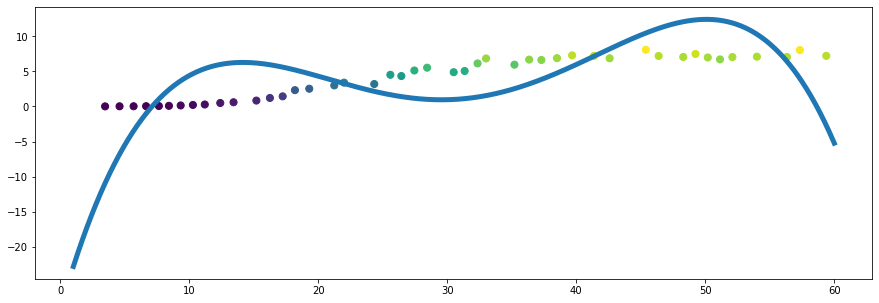

In [38]:
ts = np.linspace(1, 60, 1000) 
params = results.iloc[0, 2]
a, b, c, d, e = params
Volumen_pol_4 = a + b*ts + c*np.power(ts,2) + d*np.power(ts,3) + e*np.power(ts,4)

plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(ts, Volumen_pol_4,linewidth=5)
plt.show()

# Problema 2

Considere ahora el modelo de redes neuronales artificiales presentado arriba. Esta red neuronal artificial tiene una capa y dos neuronas. Agregue una tercera neurona.  Escriba las rutinas necesarias para optimizar los valores de los parámetros de este modelo con tres neuronas. Muestre el ajuste obtenido. Intente con diferentes valores iniciales de los parámetros y seleccione los valores calculados que arrojen un menor valor del residuo. Puede usar listas e índices para la identificación de los parámetros. 

Funciones para calcular el residuo y optimizar los parametros:

In [39]:
def residuoNN(params,V,t):
    a, b, c, d, f, g, h, i, j = params
    Vmodelo = a*(1/(1+np.exp(b*t+c))) + d*(1/(1+np.exp(f*t+g))) + h*(1/(1+np.exp(i*t+j)))
    return np.linalg.norm(V - Vmodelo)

def optimize_NN(x0):
    optimo_NN = op.minimize(residuoNN,
                            x0,
                            args=(Volumen, tiempo),
                            method='Powell')

    parametros_optimo_NN= optimo_NN.x
    residuo = optimo_NN.fun

    return residuo, parametros_optimo_NN 

1000 iteraciiones de la optimización con valores iniciales aleatorios:

In [40]:
results = []

for i in range(50):
    x0 = np.random.rand(9)
    result = (x0,) + optimize_NN(x0)
    results.append(result)

<ipython-input-39-5f617554d5cb>:3: RuntimeWarning: overflow encountered in exp
  Vmodelo = a*(1/(1+np.exp(b*t+c))) + d*(1/(1+np.exp(f*t+g))) + h*(1/(1+np.exp(i*t+j)))


Grafica del modelo con el mejor residuo:

In [41]:
results = pd.DataFrame(results, columns=["x0", "Residuo", "Parametros"]).sort_values("Residuo").reset_index(drop=True)
results.head()

,x0,Residuo,Parametros
0,"[0.11568583619701744, 0.6022174817734383, 0.53...",2.268986,"[1.5806983554451886, -0.03882674233884212, -1...."
1,"[0.8547454106906307, 0.5487060527385667, 0.212...",2.279051,"[-4.97279875042211, 0.21190099806280352, -5.87..."
2,"[0.314847802622805, 0.9729020991177584, 0.1062...",2.301876,"[-0.2261018698498971, -0.21160058738085644, 7...."
3,"[0.8017426873545986, 0.21232713946586979, 0.96...",2.309925,"[7.2011348260638695, -0.1903845195279283, 3.85..."
4,"[0.4657686693761035, 0.77003753526668, 0.83769...",2.310928,"[3.6152683264344163, 0.279444953274787, 0.9534..."


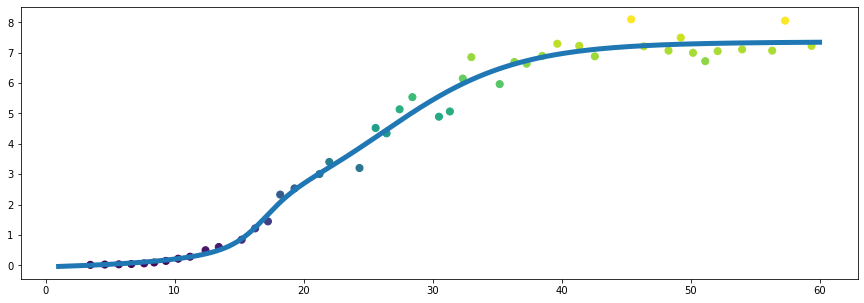

In [42]:
params = results.iloc[0, 2]
a, b, c, d, f, g, h, i, j = params
Volumen_NN = a*(1/(1+np.exp(b*ts+c))) + d*(1/(1+np.exp(f*ts+g))) + h*(1/(1+np.exp(i*ts+j)))
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(ts, Volumen_NN,linewidth=5)
plt.show()

# Problema 3

Considerar el modelo de ecuaciones diferenciales (Logistic Growth)
$$
V'= aV\left(1-\frac{V}{b}\right).
$$

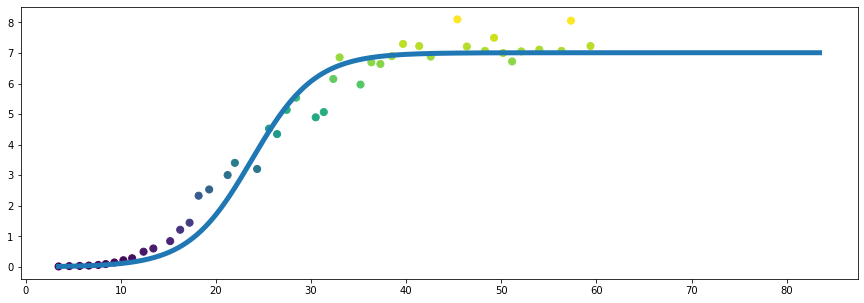

In [43]:
def modeloLG(V, t, par):
  a, b = par
  dV = a*V*(1 - (V/b))
  return dV


def residuoLG(par,V,tiempo):
  V0 = 0.0158
  VolumenSimulado = odeint(modeloLG, V0, tiempo, args=(par,))
  VS = VolumenSimulado.transpose()
  res = V-VS;
  nres = np.linalg.norm(res)
  return nres
  
optimo = op.minimize(residuoLG,[1,1], args=(Volumen,tiempo), method='Nelder-Mead')
parametro_optimo = optimo.x

tiempo_simulacion = 3.46+np.linspace(0, 80, 1000) 
V0 = 0.0158
VolumenLG = odeint(modeloLG, V0, tiempo_simulacion, args=(parametro_optimo,))
plt.figure(figsize=(15,5))
plt.scatter(tiempo,Volumen,s=50, c=Volumen)
plt.plot(tiempo_simulacion,VolumenLG,linewidth=5)
plt.show()


# Problema 4

Construya, para un conjunto de datos seleccionados, un modelo que considere adecuado y ajuste los valores de los parámetros. Es decir, repita el ejercicio arriba para otro conjunto de datos. 
Puede usar librerías de aprendizaje de máquina, de interpolación o de ajustes diferentes a las mostradas en clase. Por ejemplo, puede usar los datos de la tabla anexa (https://saludata.saludcapital.gov.co/osb/index.php/datos-de-salud/enfermedades-trasmisibles/ocupacion-ucis/). 


|Fecha |Camas UCI Covid-19|
|---|---|
|1/01/2022| 222|
|2/01/2022| 209|
|3/01/2022|217|
|4/01/2022| 245|
|5/01/2022| 252|
|6/01/2022| 278|
|7/01/2022| 291|
|8/01/2022| 299|
|9/01/2022| 302|
|10/01/2022| 292|
|11/01/2022| 311|
|12/01/2022| 306|
|13/01/2022| 326|
|14/01/2022| 332|
|15/01/2022| 368|
|16/01/2022| 356|
|17/01/2022| 373|
|18/01/2022| 397|
|19/01/2022| 410|
|20/01/2022| 431|

Puede usar los modelos vistos en clase y algunos adicionales como


$$y=A\frac{1}{x}+B$$
$$y=\frac{D}{x+C}$$
$$y=\frac{x}{Ax+B}$$
$$y=Ce^{Ax}$$
$$y=Cx^A$$
$$y=(Ax+b)^{-2}$$
$$y=Cxe^{-Dx}$$
$$y=\frac{L}{1+Ce^{Ax}}$$

entre otros. O intetente modelos de ecuaciones diferenciaqles como:

Descarga del dataset en un DataFrame. Los valores usan puntos como separadores de miles, por lo cual se deben corregir:

In [44]:
ds_url = "https://datosabiertos.bogota.gov.co/dataset/adebac34-7974-4aa8-a31d-97b2b6796e4b/resource/ecbfe485-f4a4-40d0-bc2c-628e9e5d3786/download/osb_ocupacion_ucis_covid-19_09062022.csv"
df = pd.read_csv(ds_url,
                 sep=";",
                 encoding="latin-1")
df = df.drop(df.index[-3:]) # ultimas del filas tienen datos errrados

df["Fecha"] = pd.to_datetime(df["Fecha"], dayfirst=True) # tipo de dato fecha

correct_point = lambda x: int(x) if x > 5 else int(x*1000)  # correcion de los valores
df["Camas UCI ocupadas Covid-19"] = df["Camas UCI ocupadas Covid-19"].map(correct_point)

df.head(5)

,Fecha,Camas UCI ocupadas Covid-19,Total camas UCI COVID 19 reportadas por IPS,Ocupación UCI COVID 19
0,2020-04-08,106.0,543.0,"19,50%"
1,2020-04-09,136.0,608.0,"22,40%"
2,2020-04-10,150.0,596.0,"25,20%"
3,2020-04-11,148.0,597.0,"24,80%"
4,2020-04-12,178.0,576.0,"30,90%"


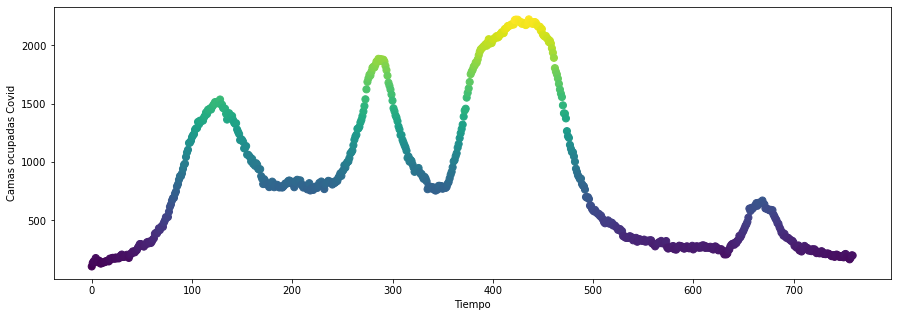

In [45]:
data = df["Camas UCI ocupadas Covid-19"].reset_index().values
x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(15,5))
plt.scatter(x,y,s=50, c=y)
plt.xlabel("Tiempo")
plt.ylabel("Camas ocupadas Covid")
plt.show()

Mediante la función `interp1d` podemos interpolar los valores de ocupación de las camas, en este caso usaremos interpolación por splines cubicas:

In [47]:
f = interp1d(x, y, kind="cubic")

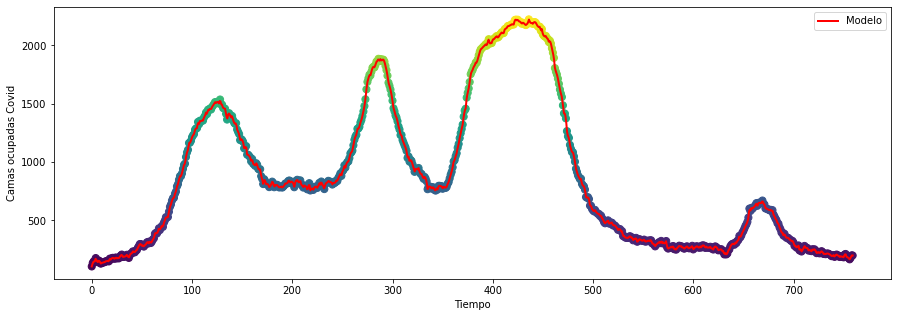

In [49]:
ts = np.linspace(x.min(), x.max(), 1000)
plt.figure(figsize=(15,5))
plt.scatter(x,y,s=50, c=y)
plt.plot(ts, f(ts), linewidth=2, color="red", label="Modelo")
plt.xlabel("Tiempo")
plt.ylabel("Camas ocupadas Covid")
plt.legend()
plt.show()